In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

### Health Insurance

In [2]:
df_plano = pd.read_csv('../data/plano_saude2.csv')
df_plano

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [3]:
X_plano = df_plano.iloc[:, 0:1].values
y_plano = df_plano.iloc[:, 1].values

In [4]:
X_plano.shape, y_plano.shape

((10, 1), (10,))

In [5]:
poly = PolynomialFeatures(degree = 4)
X_plano_poly = poly.fit_transform(X_plano)

In [7]:
X_plano_poly.shape

(10, 5)

In [8]:
X_plano_poly

array([[1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05],
       [1.0000000e+00, 2.3000000e+01, 5.2900000e+02, 1.2167000e+04,
        2.7984100e+05],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04,
        6.1465600e+05],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03, 3.5937000e+04,
        1.1859210e+06],
       [1.0000000e+00, 3.8000000e+01, 1.4440000e+03, 5.4872000e+04,
        2.0851360e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 4.8000000e+01, 2.3040000e+03, 1.1059200e+05,
        5.3084160e+06],
       [1.0000000e+00, 5.3000000e+01, 2.8090000e+03, 1.4887700e+05,
        7.8904810e+06],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07]])

In [9]:
model = LinearRegression()
model.fit(X_plano_poly, y_plano)

LinearRegression()

In [10]:
new = [[40]]
new = poly.transform(new)
model.predict(new)

array([1335.33957998])

In [14]:
y_plano

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [11]:
pred = model.predict(X_plano_poly)
pred

array([ 549.65035429,  345.85081686,  616.53846115,  975.83916022,
       1249.06759858, 1472.72727228, 1894.5104888 , 2973.29836716,
       5379.16083784, 9993.35664281])

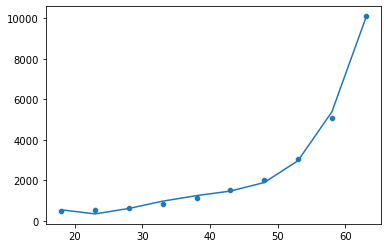

In [17]:
sns.scatterplot(x= X_plano[:,0], y= y_plano)
sns.lineplot(x= X_plano[:,0], y= pred);

### House Prices

In [18]:
df_house = pd.read_csv('../data/house_prices.csv')
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [19]:
X_house = df_house.iloc[:, 3:19].values
y_house = df_house.iloc[:, 2].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size=0.3, random_state=0)

In [21]:
X_train.shape, y_train.shape

((15129, 16), (15129,))

In [22]:
X_test.shape, y_test.shape

((6484, 16), (6484,))

In [24]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [25]:
X_train_poly.shape, X_test_poly.shape

((15129, 153), (6484, 153))

In [26]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [27]:
pred = model.predict(X_test_poly)
pred

array([ 386565.15106201, 1990824.35743713,  578571.74090576, ...,
        433247.48301697,  234397.7526474 ,  123524.10391235])

In [30]:
MAE = mean_absolute_error(y_test, pred)
MAE

101217.70530871769